## Config the notebooks file

In [1]:
invisible(source("config/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: 'magrittr'


The following object is masked from 'package:tidyr':

    extract


Loading required package: IRdisplay

Loading required package: png

Loading required package: grid



## Week 3 content:

In [2]:
iris %>% str()

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [3]:
iris %>%
select(Sepal.Length, Sepal.Width)%>%
str()

'data.frame':	150 obs. of  2 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...


In [5]:
titanic = read.csv('./datasets/titanic.csv', stringsAsFactors = T)
titanic %>% str()

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
head(titanic, 5)

,Class,Sex,Age,Survived
,<fct>,<fct>,<fct>,<fct>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No


In [7]:
table(titanic$Class,titanic$Survived)

      
        No Yes
  1st  122 203
  2nd  167 118
  3rd  528 178
  Crew 673 212

This table display the raw count of the numbers in different classes who survived or not. We can also use the prop.table to show the percentage

In [8]:
prop.table(table(titanic$Class,titanic$Survived))*100

      
              No       Yes
  1st   5.542935  9.223080
  2nd   7.587460  5.361199
  3rd  23.989096  8.087233
  Crew 30.577010  9.631985

By default, the function `prop.table()` computes the **unconditional proportion**, which is the proportion of individuals in a specific combination of categories relative to the entire population.

For example, the unconditional proportion for class = “3rd” and survived = “yes” is:

$$
P(\text{Class} = \text{3rd} \cap \text{Survived} = \text{Yes}) = \frac{\text{Count(Class = 3rd and Survived = Yes)}}{\text{Total number of individuals}}
$$



However, this unconditional proportion may be difficult to interpret, especially when the groups are imbalanced — for example, there are usually fewer people in first class than in third class. Such imbalances can obscure the underlying relationship.

To address this, we often **normalise by class** (i.e., compute conditional proportions within each class), so that we look at:

$$
P(\text{Survived} = \text{Yes} \mid \text{Class} = \text{3rd}) = \frac{\text{Count(Class = 3rd and Survived = Yes)}}{\text{Total count(Class = 3rd)}}
$$

This expresses the proportion of survivors **within each class**, making it easier to compare survival rates across classes regardless of their sizes. This can be done by setting the `margin` option in `prop.table()`:

- `margin = 1`: Normalises by row (i.e., within each class)
- `margin = 2`: Normalises by column

In [9]:
prop.table(table(titanic$Class, titanic$Survived),margin=1 )*100

      
             No      Yes
  1st  37.53846 62.46154
  2nd  58.59649 41.40351
  3rd  74.78754 25.21246
  Crew 76.04520 23.95480

##### Raw counts

In [11]:
titanic %>%
group_by(Class, Survived) %>%
summarise(Count = n(), .groups  = "drop")

Class,Survived,Count
<fct>,<fct>,<int>
1st,No,122
1st,Yes,203
2nd,No,167
2nd,Yes,118
3rd,No,528
3rd,Yes,178
Crew,No,673
Crew,Yes,212


In [12]:
titanic %>%
group_by(Class, Survived) %>%
summarise(Count = n(), .groups  = "drop") %>%
pivot_wider(
    names_from = Survived,
    values_from = Count,
    values_fill = 0
)

Class,No,Yes
<fct>,<int>,<int>
1st,122,203
2nd,167,118
3rd,528,178
Crew,673,212


##### Unnormalised Frequencies/Proportions

In [16]:
titanic %>%
group_by(Class, Survived) %>%
summarise(Count = n(), .groups = "drop") %>%
mutate(Freq = 100 * Count / sum(Count)) %>%
select(Class, Survived, Freq)

Class,Survived,Freq
<fct>,<fct>,<dbl>
1st,No,5.542935
1st,Yes,9.223080
2nd,No,7.587460
2nd,Yes,5.361199
3rd,No,23.989096
3rd,Yes,8.087233
Crew,No,30.577010
Crew,Yes,9.631985


In [17]:
titanic %>%
group_by(Class, Survived) %>%
summarise(Count = n(),.groups = "drop") %>%
mutate(Freq = 100 * Count / sum(Count)) %>%
select(Class, Survived, Freq) %>%
pivot_wider(
    names_from = Survived,
    values_from = Freq,
    values_fill = 0
)

Class,No,Yes
<fct>,<dbl>,<dbl>
1st,5.542935,9.223080
2nd,7.587460,5.361199
3rd,23.989096,8.087233
Crew,30.577010,9.631985


##### Normalized Freq

In [18]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Class) %>%
  mutate(Freq = 100*Count / sum(Count)) %>% #Here sum(Count) is computed within Class
  ungroup() %>%
  select(Class, Survived, Freq)

Class,Survived,Freq
<fct>,<fct>,<dbl>
1st,No,37.53846
1st,Yes,62.46154
2nd,No,58.59649
2nd,Yes,41.40351
3rd,No,74.78754
3rd,Yes,25.21246
Crew,No,76.04520
Crew,Yes,23.95480


In [20]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Class) %>%
  mutate(Freq = 100*Count / sum(Count)) %>% #Here sum(Count) is computed within Class
  ungroup() %>%
  select(Class, Survived, Freq) %>%
  pivot_wider(
    names_from = Survived,
    values_from = Freq,
    values_fill = 0
  )

Class,No,Yes
<fct>,<dbl>,<dbl>
1st,37.53846,62.46154
2nd,58.59649,41.40351
3rd,74.78754,25.21246
Crew,76.04520,23.95480


### Graphical summaries

#### Bar chart

We can use the bar chart to visualize the bivariate categorical data.

To display the bar chart side-by-side we can use position = "dodge" to the geom_bar(). We can also use stat = "count", which is also the default if we don't declare anything else

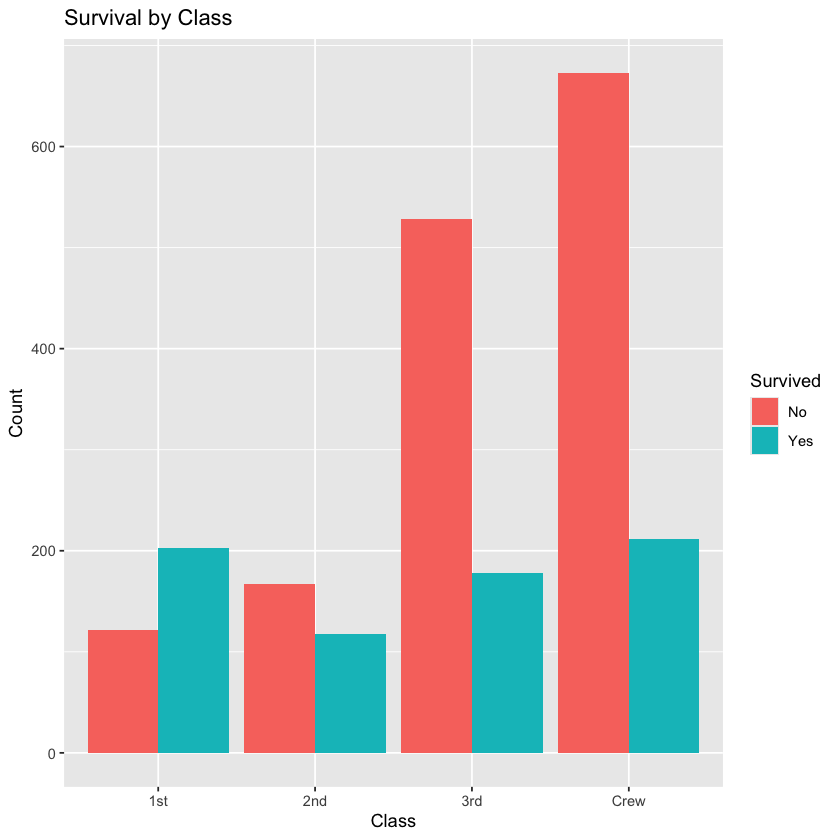

In [21]:
titanic %>%
ggplot(aes(x = Class, fill = Survived)) +
geom_bar(position = "dodge", stat = "count") +
labs(y = "Count", title = "Survival by Class")

If we use stat = "identity", it means that we use the y-values directly, not any other kinds of values

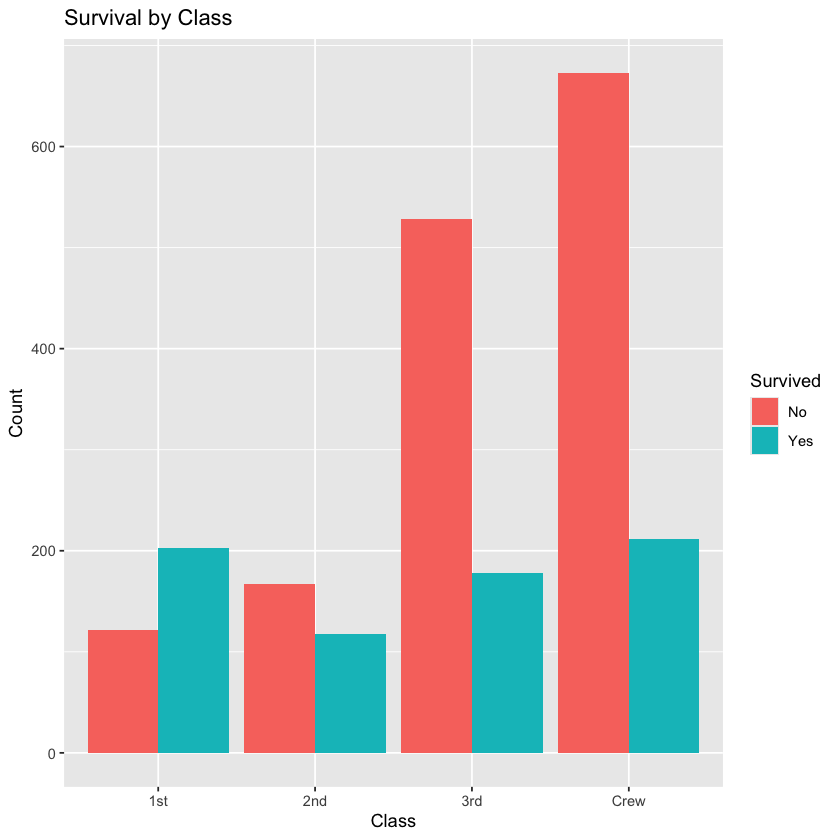

In [22]:
titanic %>%
group_by(Class, Survived) %>%
summarise(Count = n(),.groups = "drop") %>%
ggplot(aes(x = Class, y = Count, fill = Survived)) +
geom_bar(stat = "identity", position = "dodge") +
labs(y = "Count", title = "Survival by Class")

#### Mosaic Plot

Mosaic Plot is base R visualization that directly takes the contigency table as the input

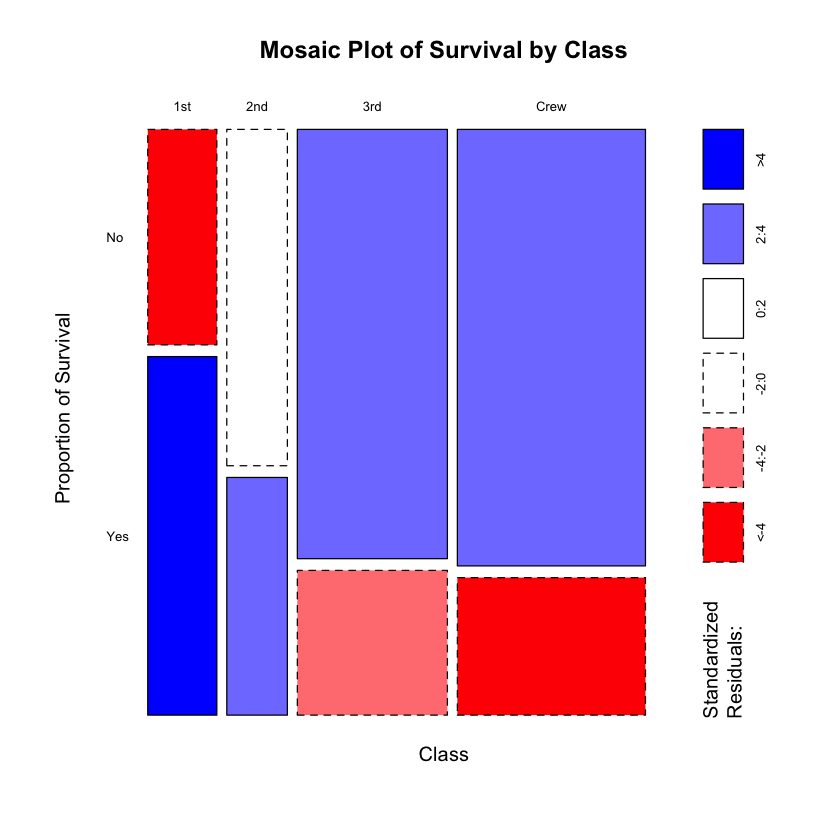

In [29]:
par(bg = "White")
titanic %>%
select(Class, Survived) %>%
table() %>%
mosaicplot(
    main = "Mosaic Plot of Survival by Class",
    xlab = "Class",
    ylab = "Proportion of Survival",
    color = TRUE,
    shade = TRUE,
    las = 1)

Combined bivariate data combines of both numeric and categorical data.

When working with bivariate datasets that combine numeric and categorical variables, some key questions we might want to answer include:

1. How does the numeric variable differ across the categories?
2. Are there clear patterns or differences in distribution by category?
3. Can the categorical variable help explain variability in the numeric variable?
4. What summary statistics (mean, median, range) characterise each group?
5. Are there outliers or unusual observations within any category?

Techniques for formally addressing many of these questions will be introduced later in this unit. For now, we will focus primarily on graphical and informal summaries, especially to explore questions 2 and 4.


In [33]:
iris %>%
group_by(Species) %>%
summarise(
    Sepal_Length_Mean = mean(Sepal.Length),
    Sepal_SD = sd(Sepal.Length))%>%
ungroup() %>%
mutate(lowerInterval = Sepal_Length_Mean - 2*Sepal_SD,
       upperInterval = Sepal_Length_Mean + 2*Sepal_SD)

Species,Sepal_Length_Mean,Sepal_SD,lowerInterval,upperInterval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,0.3524897,4.301021,5.710979
versicolor,5.936,0.5161711,4.903658,6.968342
virginica,6.588,0.6358796,5.316241,7.859759


The difference between facet_wrap and fill is that while facet_wrap create new charts for each category, the fill is used to put all the boxplots in one figure

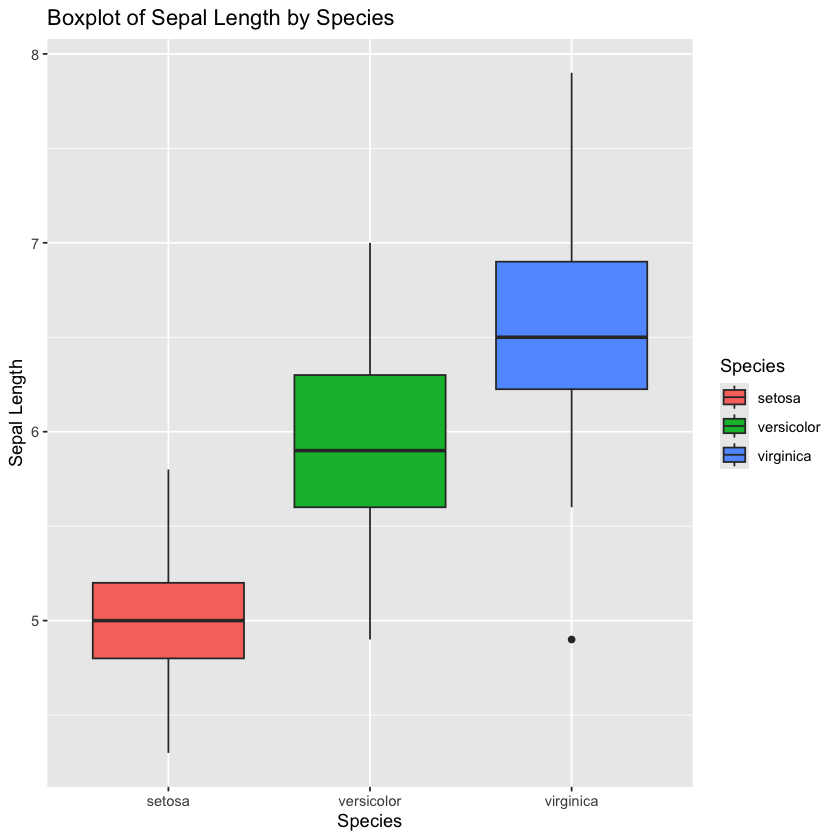

In [34]:
iris %>%
ggplot(aes(x = Species, y = Sepal.Length, fill = Species)) +
geom_boxplot() +
labs(y = "Sepal Length", title = "Boxplot of Sepal Length by Species")

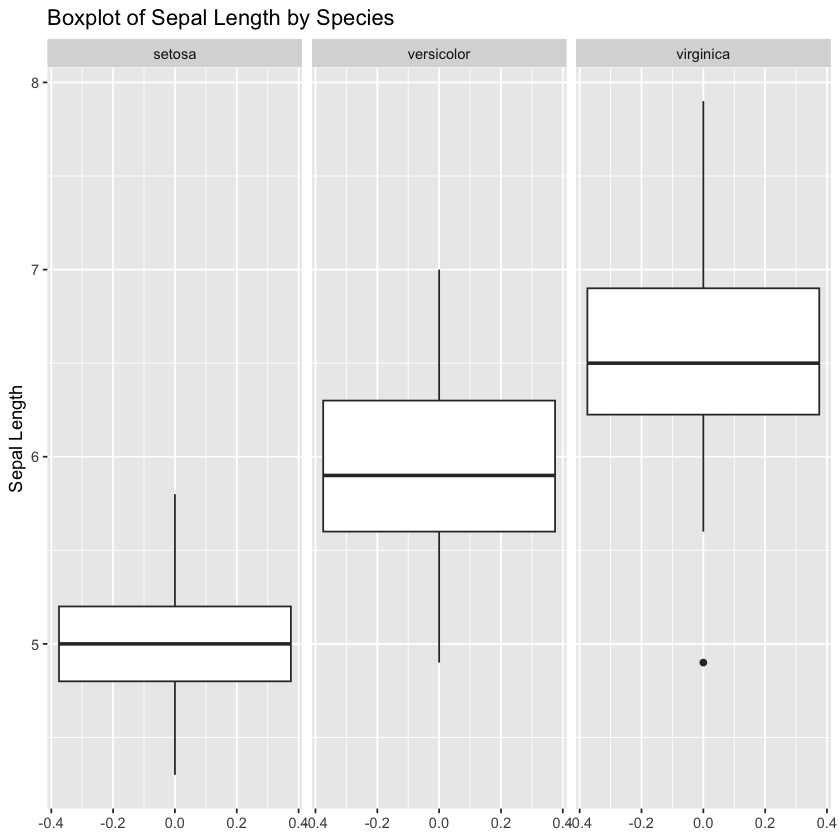

In [35]:
iris %>%
ggplot(aes(y = Sepal.Length )) +
geom_boxplot() +
facet_wrap(~ Species) +
labs(y = "Sepal Length", title = "Boxplot of Sepal Length by Species")

In [36]:
epa_data = read.csv('./datasets/epa_data.csv')

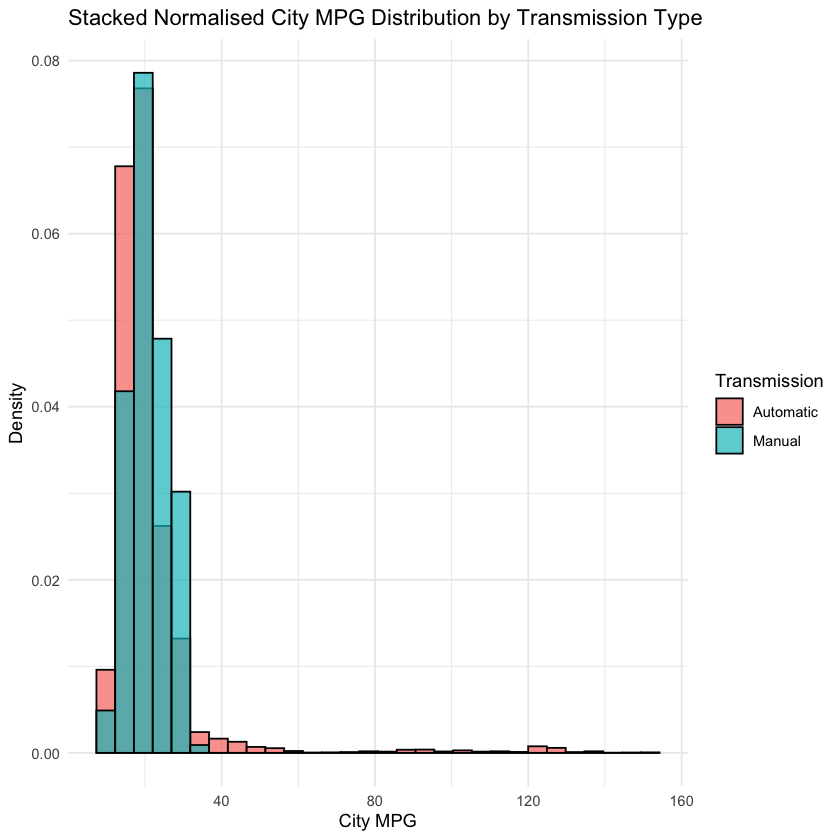

In [37]:

epa_data %>%
  ggplot(aes(x = city, fill = trans)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins = 30,
                 alpha = 0.7,
                 color = "black", #border color
                 position = "identity") +             
  labs(title = "Stacked Normalised City MPG Distribution by Transmission Type",
       x = "City MPG",
       y = "Density",
       fill = "Transmission") +
  theme_minimal()



### **Covariance**

If sample variance for a numeric vector `x` is defined as:

$$
s_x^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}
$$

or the "mean" of the squared distance between observations, then it follows that covariance is defined as:

$$
s_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

where:

- $(x_i, y_i)$ is a **paired** observation indexed by $i$.
- $\bar{x}, \bar{y}$ are the sample means of $x$ and $y$.
- $n$ is the number of observations.

**By definition, sample variance is the covariance between one variable and itself.**


Covariance is a statistical measure that quantifies the degree to which two variables change together. Specifically, it measures the **linear relationship** between two continuous variables.

- A **positive covariance** indicates that as one variable increases, the other tends to increase as well.
- A **negative covariance** means that as one variable increases, the other tends to decrease.
- A covariance close to zero suggests there is little to no linear relationship between the variables.


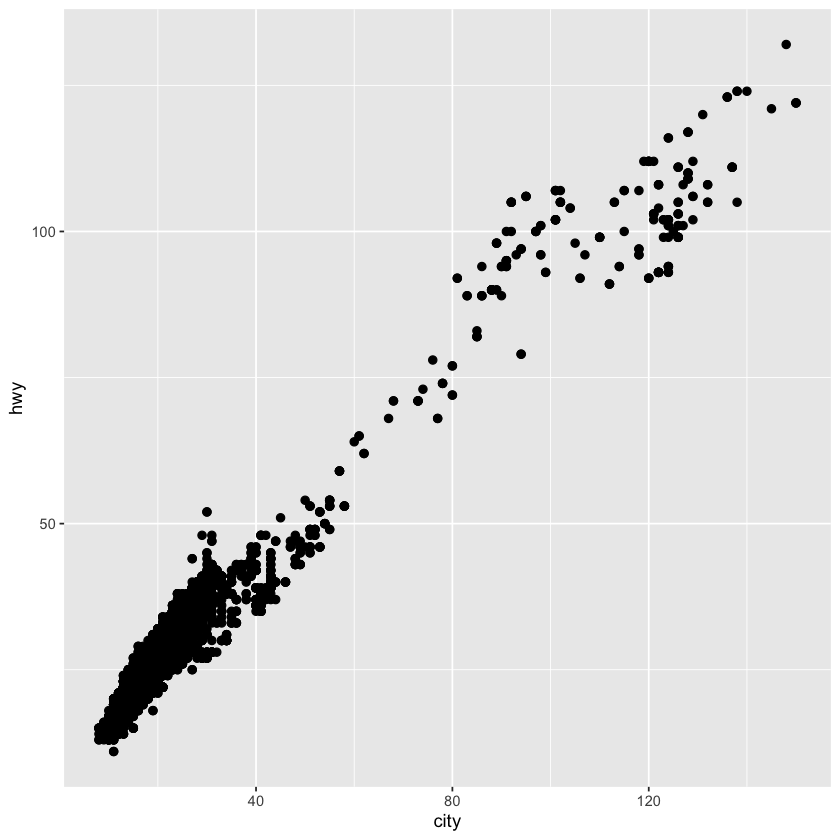

In [38]:
epa_data %>%
ggplot(aes(x = city, y = hwy)) +
geom_point(size = 2)

In [39]:
cov(epa_data$city, epa_data$hwy)

[1] 132.6544

### **Correlation**

Covariance tells us the **direction** of the linear relationship between two variables but does **not** tell us how **strong** that relationship is.

Additionally, covariance depends on the **units** of measurement (the scale of the data). For example, imagine we no longer measure `city` and `hwy` EPA in miles per gallon (mpg), but instead in kilometers per litre (km/L or kpL). Since the units have changed, the covariance value would also change, making it difficult to compare across different datasets or variables measured on different scales.



We need a **standardised summary** that can determine both the **direction** and **strength** of a linear relationship, while also being **unitless** and **comparable across different datasets** or examples $⟶$ correlation coefficient.

The **correlation coefficient** $r_{xy}$ between two variables `x` and `y` is given by:

$$
r_{xy} = \frac{s_{xy}}{s_x s_y}.
$$

Thus, correlation is covariance standardised by the product of the variables' standard deviations.

The correlation coefficient $r$ always lies between $-1$ and $1$:

- $r = 1$ indicates a **perfect positive linear relationship**: as one variable increases, the other increases proportionally.
- $r = -1$indicates a **perfect negative linear relationship**: as one variable increases, the other decreases proportionally.
- $r = 0$ suggests **no linear relationship** between the variables.

In R, we can use the `cor(x,y)` function to computes the correlation between numeric vectors `x` and `y`.


In [41]:
cor(epa_data$city, epa_data$hwy)

[1] 0.9658684

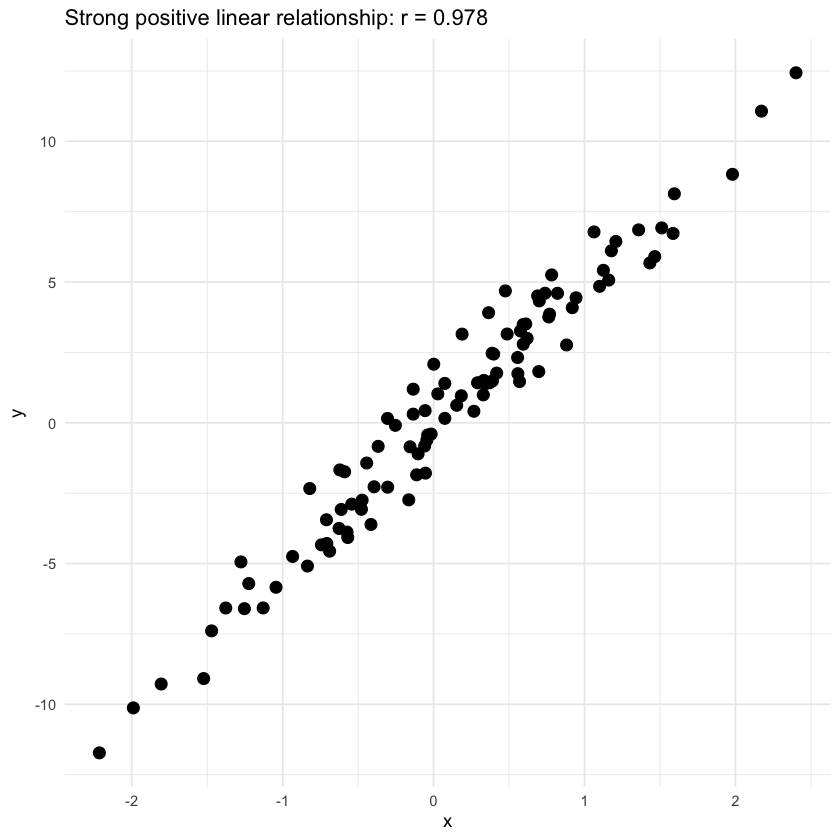

In [42]:
# strong positive linear relationship
strong_pos = read.csv("datasets/strong_pos_linear.csv")
rVal = cor(strong_pos$x, strong_pos$y)

strong_pos %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Strong positive linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

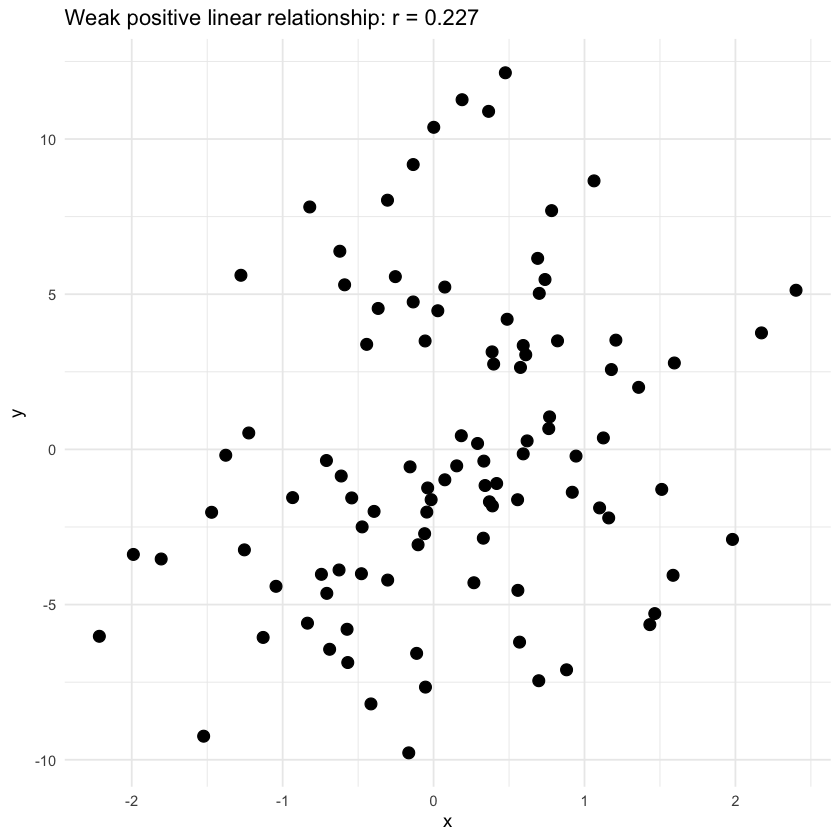

In [43]:
# Weak positive linear relationship
weak_pos = read.csv("datasets/weak_pos_linear.csv")
rVal = cor(weak_pos$x, weak_pos$y)

weak_pos %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Weak positive linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

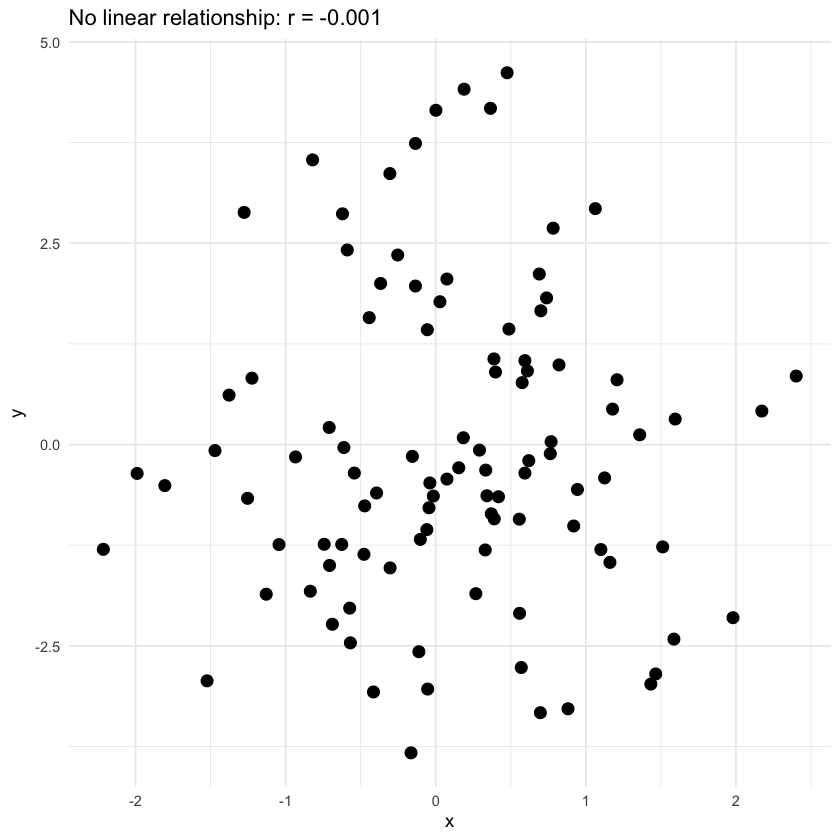

In [46]:
# No linear relationship
no_linear = read.csv("./datasets/no_linear_rel.csv")
rVal = cor(no_linear$x, no_linear$y)

no_linear %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("No linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

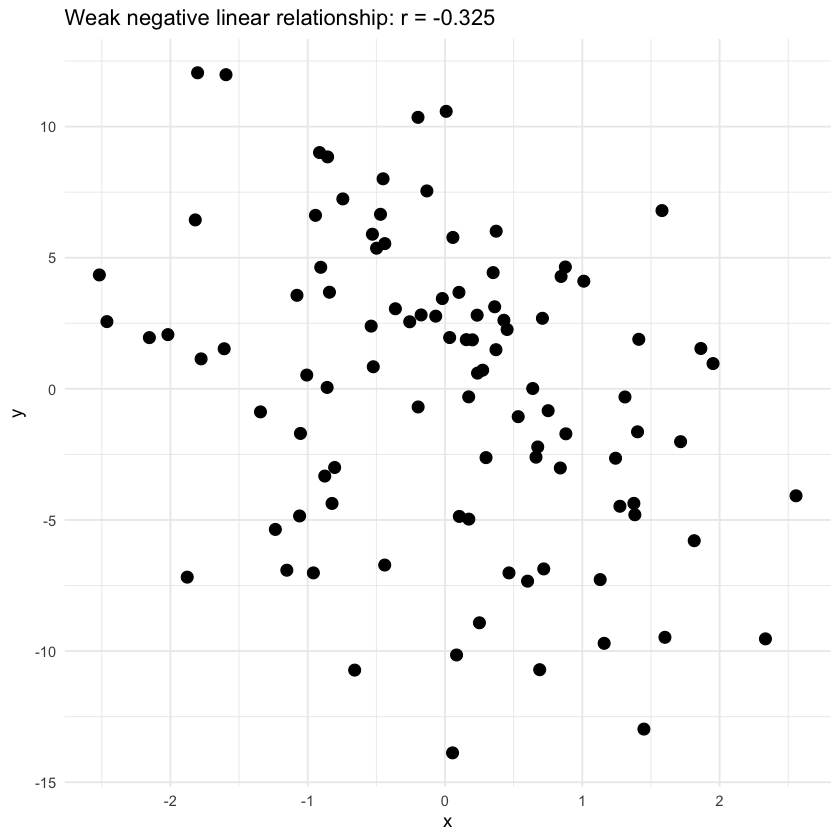

In [47]:
# Weak negative linear relationship 
weak_neg = read.csv("datasets/weak_neg_linear.csv")
rVal = cor(weak_neg$x, weak_neg$y)

weak_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Weak negative linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

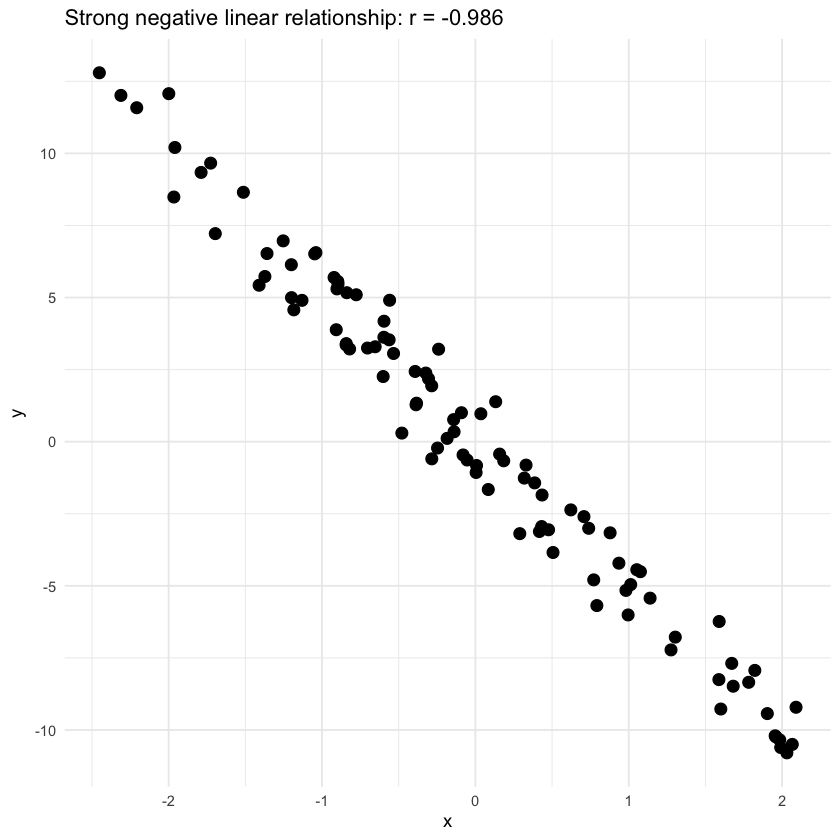

In [49]:
# strong negative linear relationship  
strong_neg = read.csv("datasets/strong_neg_linear.csv")
rVal = cor(strong_neg$x, strong_neg$y)

strong_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Strong negative linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

### **Least-Squares Line**

**To quantify linear relationship** between two variables $x$ and $y$, we can fit a **least-squares regression line** of the form:

$$
y = \hat{a} + \hat{b}x.
$$

This line minimises the total squared vertical distance between the observed points and the line:

$$
\min_{a, b} \sum_{i=1}^{n} (y_i - a - bx_i)^2.
$$

The solutions for the slope $\hat{b}$ and intercept $\hat{a}$$are:

$$
\hat{b} = \frac{s_{xy}}{s_x^2} = r \cdot \frac{s_y}{s_x},
$$
and
$$
\hat{a} = \bar{y} - \hat{b}\bar{x}.
$$

The **slope** depends on the correlation $r$, and the ratio of the standard deviations of $y$ and $x$, having the same sign as $s_{xy}$ and $r_{xy}$). The **intercept** adjusts to ensure the line passes through the point $(\bar{x}, \bar{y})$.

In R, we can use the `lm()` function to compute the slope and intercept of the best fitting line.

In [50]:
strong_pos %>%
lm(formula =y ~ x)


Call:
lm(formula = y ~ x, data = .)

Coefficients:
(Intercept)            x  
   -0.03769      4.99894  


We can manually compute this

In [51]:
mean_x = mean(strong_pos$x)
mean_y = mean(strong_pos$y)
s_xy = cov(strong_pos$x, strong_pos$y)
s_x = var(strong_pos$x)

b_hat = s_xy/s_x
a_hat = mean_y - mean_x*b_hat
b_hat
a_hat

[1] 4.99894

[1] -0.03769261

We can use the geom_point to draw the best fit line in the graph and set se to whether display the confidence bands or not

`geom_smooth()` using formula = 'y ~ x'


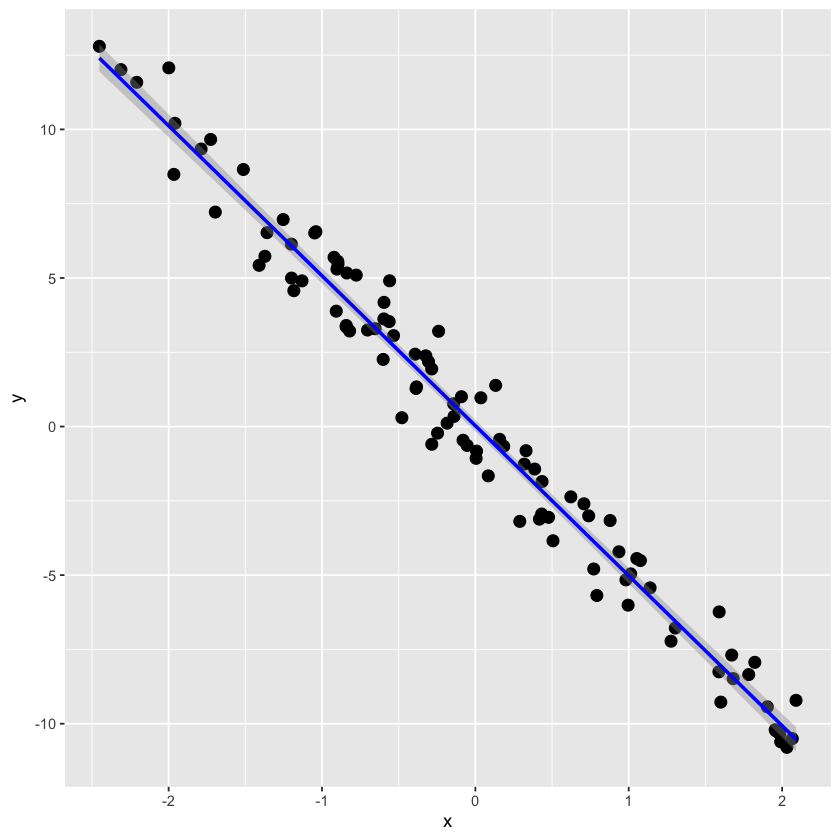

In [52]:
strong_neg %>%
ggplot(aes(x = x, y = y )) +
geom_point(size = 3, color = "black") +
geom_smooth(method = "lm", se = TRUE, color = "blue") 

`geom_smooth()` using formula = 'y ~ x'


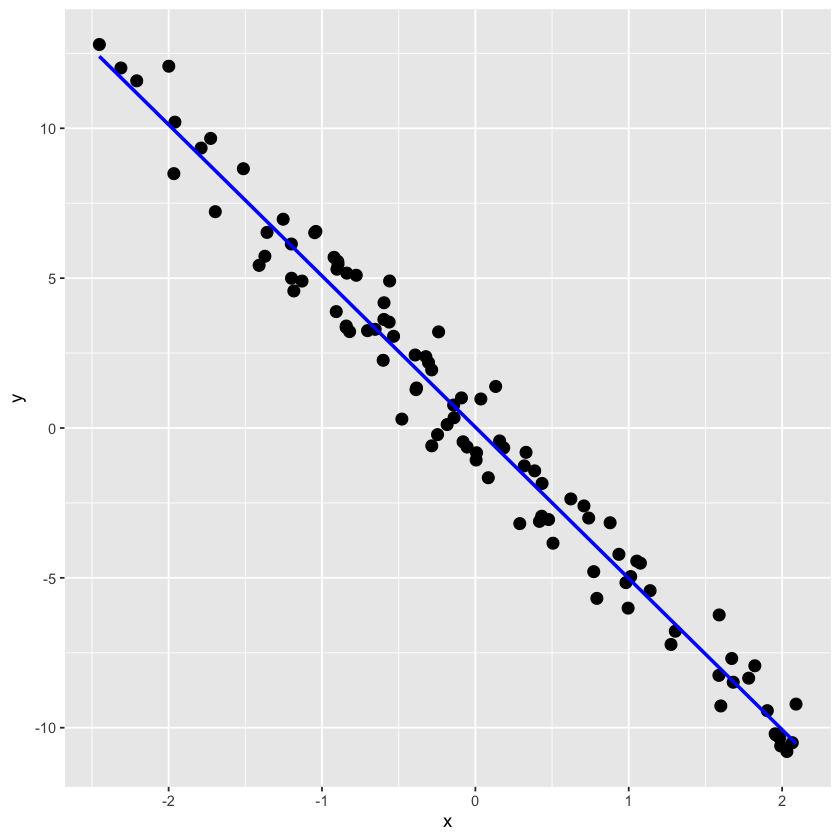

In [53]:
strong_neg %>%
ggplot(aes(x = x, y = y)) +
geom_point(size = 3, color = "black") +
geom_smooth(method = "lm", se = FALSE, color = "blue")

In [54]:
weak_pos %>% 
lm(formula = y ~ x)



Call:
lm(formula = y ~ x, data = .)

Coefficients:
(Intercept)            x  
    -0.1885       1.2447  


In [55]:
mean_x = mean(weak_pos$x)
mean_y = mean(weak_pos$y)
s_xy  = cov(weak_pos$x, weak_pos$y)
s_x = var(weak_pos$x)
s_y = var(weak_pos$y)
b_hat = s_xy/s_x
a_hat = mean_y - mean_x*b_hat

In [56]:
b_hat
a_hat

[1] 1.244698

[1] -0.1884631

`geom_smooth()` using formula = 'y ~ x'


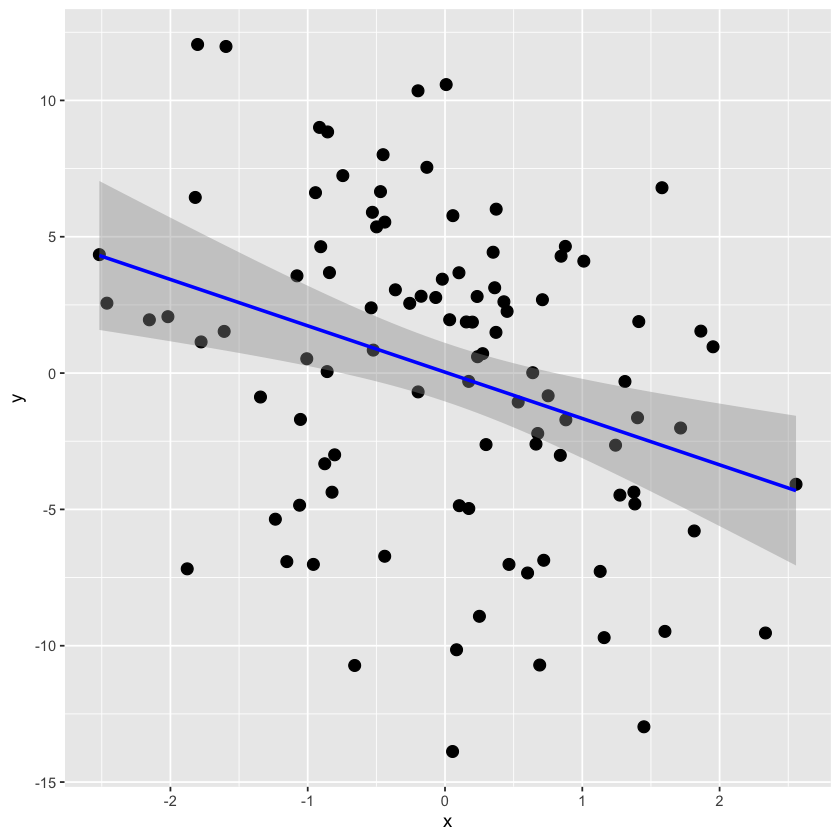

In [57]:
weak_neg %>%
ggplot(aes(x = x , y = y)) +
geom_point(size = 3, color = "black") + 
geom_smooth(method = "lm", se = TRUE, color = "blue") 

## Workshop excersises

Congistency Table

In [61]:
titanic %>%
select(Sex, Survived) %>%
table()

        Survived
Sex        No  Yes
  Female  126  344
  Male   1364  367

In [64]:
titanic %>%
  group_by(Sex, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Sex) %>%
  mutate(Freq = 100*Count / sum(Count)) %>% #Here sum(Count) is computed within Class
  ungroup() %>%
  select(Sex, Survived, Freq) %>%
  pivot_wider(
    names_from = Survived,
    values_from = Freq,
    values_fill = 0
  )

Sex,No,Yes
<fct>,<dbl>,<dbl>
Female,26.80851,73.19149
Male,78.79838,21.20162


Using bar plot to investigate whether the Sex influences the Survived one

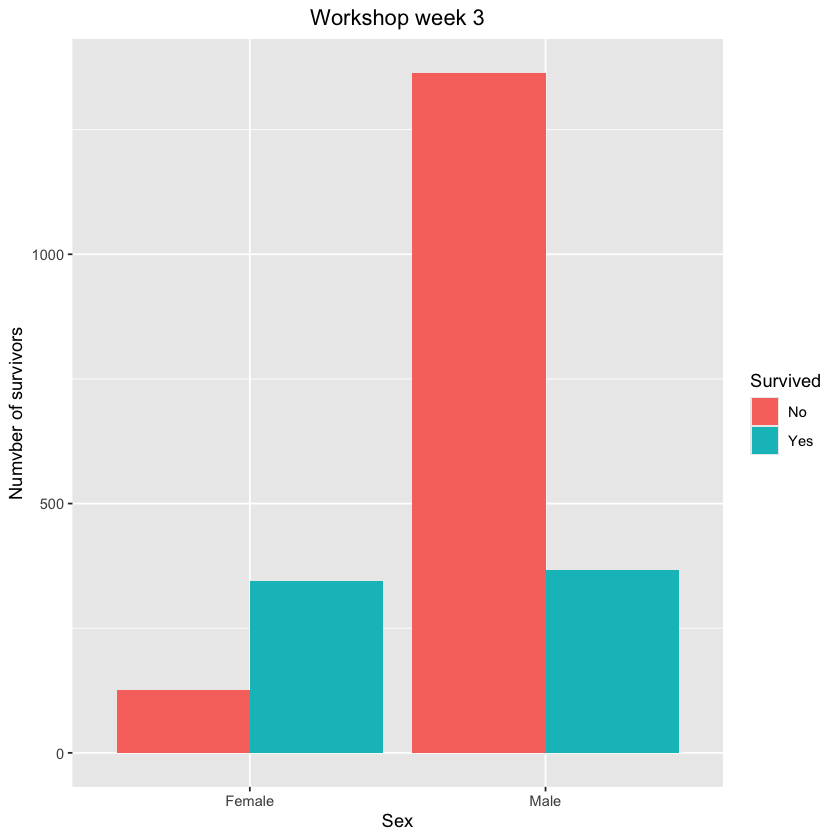

In [67]:
titanic %>%
ggplot(aes(x = Sex, fill = Survived)) +
geom_bar(position = "dodge") +
labs(y = "Numvber of survivors", title = "Workshop week 3") +
theme(plot.title = element_text(hjust = 0.5))